# Day 1

In [1]:
input = parse.(Int, eachline("input1.txt"))

100-element Array{Int64,1}:
 125517
 140694
  65516
  98562
  75660
 133603
 114499
  81732
 119081
  50911
  96650
  98330
 145164
      ⋮
 109410
 135350
 112070
  88822
 149086
  64594
 118788
 102569
  61721
  89170
  83581
  58722

In [2]:
sum(x ÷ 3 - 2 for x in input)

3317100

In [3]:
function fuel_required(mass::Integer)
    baseFuel = mass ÷ 3 - 2
    if baseFuel > 0
        return baseFuel + fuel_required(baseFuel)
    else
        0
    end
end

fuel_required (generic function with 1 method)

In [4]:
sum(fuel_required(x) for x in input)

4972784

# Day 2

In [1]:
input = parse.(Int, split(readline("input2.txt"), ","))

145-element Array{Int64,1}:
   1
   0
   0
   3
   1
   1
   2
   3
   1
   3
   4
   3
   1
   ⋮
 131
   2
 135
   1
  10
 135
   0
  99
   2
   0
  14
   0

In [17]:
mutable struct Intcode
    memory::Vector{Int}
    pc::Int
    
    Intcode(input::AbstractVector{Int64}) = new(input[:], 1)
end

ErrorException: invalid redefinition of constant Intcode

In [18]:
isdone(cpu::Intcode) = cpu.memory[cpu.pc] == 99

isdone (generic function with 1 method)

In [19]:
function readNextInt(cpu::Intcode)
    ret = cpu.memory[cpu.pc]
    cpu.pc += 1
    return ret
end

readNextInt (generic function with 1 method)

In [20]:
function next!(cpu::Intcode)
    opcode = readNextInt(cpu)
    if opcode == 1
        a,b,c = readNextInt(cpu),readNextInt(cpu),readNextInt(cpu)
        cpu.memory[c+1] = cpu.memory[a+1] + cpu.memory[b+1]
    elseif opcode == 2
        a,b,c = readNextInt(cpu),readNextInt(cpu),readNextInt(cpu)
        cpu.memory[c+1] = cpu.memory[a+1] * cpu.memory[b+1]
    elseif opcode == 99
        return
    else
        throw("Unknown opcode $opcode")
    end
end

next! (generic function with 1 method)

In [22]:
@time for i = 1:99, j = 1:99
    let cpu = Intcode(input)
        cpu.memory[2:3] = [i,j]
        while !isdone(cpu)
            next!(cpu)
        end
        if cpu.memory[1] == 19690720
            @show i,j
            @show 100*i+j
        end
    end
end

(i, j) = (98, 20)
100i + j = 9820
  0.215754 seconds (688.65 k allocations: 28.151 MiB, 1.69% gc time)


# Day 3

In [24]:
const directions = Dict(
    'L' => (-1, 0),
    'R' => (+1, 0),
    'U' => ( 0,-1),
    'D' => ( 0,+1)
)
function parseMove(s)
    dir = directions[s[1]]
    steps = parse(Int, s[2:end])
    return dir .* steps
end

parseMove (generic function with 1 method)

In [119]:
pathA, pathB = map.(parseMove, split.(eachline("input3.txt"), ","))

2-element Array{Array{Tuple{Int64,Int64},1},1}:
 [(1008, 0), (0, 256), (-88, 0), (0, -390), (429, 0), (0, 828), (2, 0), (0, 452), (-644, 0), (0, 942)  …  (0, -911), (-21, 0), (0, 201), (-881, 0), (0, -119), (210, 0), (0, 700), (93, 0), (0, -208), (116, 0)]    
 [(-1009, 0), (0, 700), (-634, 0), (0, -294), (898, 0), (0, 947), (650, 0), (0, -988), (-623, 0), (0, 968)  …  (0, 625), (565, 0), (0, -728), (134, 0), (0, 406), (785, 0), (0, -583), (60, 0), (0, 819), (-939, 0)]

In [52]:
let pos = (11857,3841)
    positions = [pos]
    for mv in pathA
        pos = pos .+ mv
        push!(positions,pos)
    end
    xPos = first.(positions)
    xMin,xMax = minimum(xPos),maximum(xPos)
    yPos = last.(positions)
    yMin,yMax = minimum(yPos),maximum(yPos)
    @show xMin, xMax
    @show yMin, yMax
end

(xMin, xMax) = (5042, 14066)
(yMin, yMax) = (115, 11536)


(115, 11536)

In [53]:
let pos = (11857,3841)
    positions = [pos]
    for mv in pathB
        pos = pos .+ mv
        push!(positions,pos)
    end
    xPos = first.(positions)
    xMin,xMax = minimum(xPos),maximum(xPos)
    yPos = last.(positions)
    yMin,yMax = minimum(yPos),maximum(yPos)
    @show xMin, xMax
    @show yMin, yMax
end

(xMin, xMax) = (1, 13705)
(yMin, yMax) = (1, 11122)


(1, 11122)

In [133]:
grid = BitMatrix(undef, 14066, 11536)
fill!(grid, false)

14066×11536 BitArray{2}:
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
     ⋮                    

In [159]:
sizeof(grid)

20283176

In [134]:
let pos = (11857,3841)
    for mv in pathA
        newPos = pos .+ mv
        if mv[1] != 0
            r = Nothing
            if mv[1] > 0
                r = pos[1]+1:newPos[1]
            else
                r = pos[1]-1:-1:newPos[1]
            end
            grid[r, pos[2]:pos[2]] .= true
        else
            r = Nothing
            if mv[2] > 0
                r = pos[2]+1:newPos[2]
            else
                r = pos[2]-1:-1:newPos[2]
            end
            grid[pos[1]:pos[1], r] .= true
        end
        pos = newPos
    end
end

In [135]:
manhattendist(a, b) = abs.(a .- b) |> sum

manhattendist (generic function with 1 method)

In [136]:
intersections = let pos = (11857,3841)
    closestDist = typemax(Int)
    intersections = Tuple{Int,Int}[]
    for mv in pathB
        newPos = pos .+ mv
        if mv[1] != 0
            r = Nothing
            if mv[1] > 0
                r = pos[1]+1:newPos[1]
            else
                r = pos[1]-1:-1:newPos[1]
            end
            for i in r
                if grid[i, pos[2]]
                    dist = manhattendist((i,pos[2]), (11857,3841))
                    if dist < closestDist
                        closestDist = dist
                    end
                    push!(intersections, (i,pos[2]))
                end
            end
        else
            r = Nothing
            if mv[2] > 0
                r = pos[2]+1:newPos[2]
            else
                r = pos[2]-1:-1:newPos[2]
            end
            for j in r
                if grid[pos[1], j]
                    dist = manhattendist((pos[1], j), (11857,3841))
                    if dist < closestDist
                        closestDist = dist
                    end
                    push!(intersections, (pos[1], j))
                end
            end
        end
        pos = newPos
    end
    @show closestDist
    
    intersections
end

closestDist = 870


159-element Array{Tuple{Int64,Int64},1}:
 (11806, 5174)
 (11900, 5135)
 (13208, 4747)
 (13226, 5602)
 (12564, 5602)
 (12423, 5135)
 (11969, 5135)
 (11806, 5260)
 (11729, 5697)
 (12429, 5440)
 (12477, 5440)
 (12564, 5440)
 (12642, 5929)
 ⋮            
 (7747, 5407) 
 (7519, 5046) 
 (6444, 2811) 
 (6584, 2811) 
 (6671, 2767) 
 (6671, 2512) 
 (6671, 2274) 
 (5769, 1849) 
 (5744, 1394) 
 (5267, 689)  
 (5645, 689)  
 (5491, 689)  

In [137]:
intersectionSteps = Dict(
    k => (-1,-1) for k in intersections
)

Dict{Tuple{Int64,Int64},Tuple{Int64,Int64}} with 159 entries:
  (8469, 5209)  => (-1, -1)
  (9158, 6864)  => (-1, -1)
  (11969, 5135) => (-1, -1)
  (7917, 3622)  => (-1, -1)
  (6671, 2512)  => (-1, -1)
  (7702, 6486)  => (-1, -1)
  (13008, 3707) => (-1, -1)
  (7539, 8047)  => (-1, -1)
  (7588, 3622)  => (-1, -1)
  (8304, 4826)  => (-1, -1)
  (7592, 6078)  => (-1, -1)
  (7362, 7642)  => (-1, -1)
  (7706, 3704)  => (-1, -1)
  (12564, 5602) => (-1, -1)
  (8052, 3728)  => (-1, -1)
  (13458, 5881) => (-1, -1)
  (12677, 5740) => (-1, -1)
  (8290, 3572)  => (-1, -1)
  (8052, 3704)  => (-1, -1)
  (8166, 1828)  => (-1, -1)
  (8307, 6739)  => (-1, -1)
  (8173, 4905)  => (-1, -1)
  (8398, 5422)  => (-1, -1)
  (11729, 5697) => (-1, -1)
  (7593, 5853)  => (-1, -1)
  ⋮             => ⋮

In [138]:
let pos = (11857,3841)
    steps = 0
    for mv in pathA
        newPos = pos .+ mv
        if mv[1] != 0
            r = Nothing
            if mv[1] > 0
                r = pos[1]+1:newPos[1]
            else
                r = pos[1]-1:-1:newPos[1]
            end
            for i in r
                steps += 1
                if haskey(intersectionSteps, (i, pos[2])) && intersectionSteps[(i, pos[2])][1] == -1
                    intersectionSteps[(i, pos[2])] = (steps, intersectionSteps[(i, pos[2])][2])
                end
            end
        else
            r = Nothing
            if mv[2] > 0
                r = pos[2]+1:newPos[2]
            else
                r = pos[2]-1:-1:newPos[2]
            end
            for j in r
                steps += 1
                if haskey(intersectionSteps, (pos[1],j)) && intersectionSteps[(pos[1],j)][1] == -1
                    intersectionSteps[(pos[1],j)] = (steps, intersectionSteps[(pos[1],j)][2])
                end
            end
        end
        pos = newPos
    end
end

In [139]:
let pos = (11857,3841)
    steps = 0
    for mv in pathB
        newPos = pos .+ mv
        if mv[1] != 0
            r = Nothing
            if mv[1] > 0
                r = pos[1]+1:newPos[1]
            else
                r = pos[1]-1:-1:newPos[1]
            end
            for i in r
                steps += 1
                if haskey(intersectionSteps, (i, pos[2])) && intersectionSteps[(i, pos[2])][2] == -1
                    intersectionSteps[(i, pos[2])] = (intersectionSteps[(i, pos[2])][1], steps)
                end
            end
        else
            r = Nothing
            if mv[2] > 0
                r = pos[2]+1:newPos[2]
            else
                r = pos[2]-1:-1:newPos[2]
            end
            for j in r
                steps += 1
                if haskey(intersectionSteps, (pos[1],j)) && intersectionSteps[(pos[1],j)][2] == -1
                    intersectionSteps[(pos[1],j)] = (intersectionSteps[(pos[1],j)][1], steps)
                end
            end
        end
        pos = newPos
    end
end

In [141]:
[a + b for (k,(a,b)) in intersectionSteps] |> minimum

13698

# Day 4

In [142]:
input = 234208:765869

234208:765869

In [143]:
function part1_predicate(n::Integer)
    D = digits(n)
    issorted(D) && length(unique(D)) <= 5
end

part1_predicate (generic function with 1 method)

In [144]:
count(part1_predicate, input)

1246

In [157]:
function countmap(itr)
    mp = Dict{eltype(itr), Int}()
    for x in itr
        if haskey(mp, x)
            mp[x] += 1
        else
            mp[x] = 1
        end
    end
    return mp
end

countmap (generic function with 1 method)

In [148]:
function part2_predicate(n::Integer)
    D = digits(n)
    issorted(D) && any(v==2 for v in values(countmap(D)))
end

part2_predicate (generic function with 1 method)

In [158]:
count(part2_predicate, input)

814

# Day 5

In [100]:
input = parse.(Int,split(readline("input5.txt"), ","))

678-element Array{Int64,1}:
    3
  225
    1
  225
    6
    6
 1100
    1
  238
  225
  104
    0
 1101
    ⋮
  223
 1005
  224
  674
  101
    1
  223
  223
    4
  223
   99
  226

In [102]:
include("Intcode.jl")

next! (generic function with 2 methods)

In [106]:
let cpu = Intcode(input)
    enqueue!(cpu.input, 1)
    while !isdone(cpu)
        next!(cpu)
    end
    println(last(collect(cpu.output)))
end

10987514


In [111]:
let cpu = Intcode(input)
    enqueue!(cpu.input, 5)
    while !isdone(cpu)
        next!(cpu)
    end
    println(dequeue!(cpu.output))
end

14195011


# Day 6

In [35]:
input = Dict( (((a,b) = split(line, ")")); b => a) for line in eachline("input6.txt"))

Dict{SubString{String},SubString{String}} with 1110 entries:
  "QMZ" => "F7V"
  "YOU" => "SPV"
  "3HG" => "Y9B"
  "TK7" => "88Z"
  "ZDH" => "N8P"
  "SAN" => "6SF"
  "HBF" => "K68"
  "ZKZ" => "4F9"
  "69M" => "2YN"
  "F72" => "B53"
  "PJF" => "N42"
  "7TN" => "JQ9"
  "QM5" => "ZKZ"
  "JBN" => "N9V"
  "KCL" => "B9W"
  "9H9" => "F59"
  "Y23" => "ZZZ"
  "T7M" => "HPL"
  "PKR" => "B4Y"
  "X5S" => "LSR"
  "KDX" => "XQ4"
  "T6V" => "44Y"
  "HF3" => "QBJ"
  "8VL" => "36P"
  "CGK" => "NX3"
  ⋮     => ⋮

In [8]:
orbitCount = Dict{String, Int}()
function count_orbits(str)
    if str == "COM"
        0
    elseif !haskey(orbitCount, str)
        orbitCount[str] = 1 + count_orbits(input[str])
    else
        orbitCount[str]
    end
end

count_orbits (generic function with 1 method)

In [9]:
sum(count_orbits(str) for (str, _) in input )

145250

In [17]:
function rootpath(node)
    path = [node]
    while node != "COM"
        node = input[node]
        push!(path, node)
    end
    reverse!(path)
end

rootpath (generic function with 1 method)

In [14]:
function first_not_equal_idx(a1, a2)
    for i = 1:min(length(a1), length(a2))
        if a1[i] != a2[i]
            return i
        end
    end
end

first_not_equal_idx (generic function with 1 method)

In [37]:
function distance(n1, n2)
    path1 = rootpath(n1)
    path2 = rootpath(n2)
    i = first_not_equal_idx(path1, path2)
    1 + length(i:length(path1)) + length(i+1:length(path2))
end

distance (generic function with 1 method)

In [38]:
distance(input["YOU"], input["SAN"])

274

# Day 7

In [29]:
using Combinatorics
include("Intcode.jl")
input = parse.(Int,split(readline("input7.txt"), ","))
#input = parse.(Int,split("3,26,1001,26,-4,26,3,27,1002,27,2,27,1,27,26,27,4,27,1001,28,-1,28,1005,28,6,99,0,0,5", ","))

511-element Array{Int64,1}:
    3
    8
 1001
    8
   10
    8
  105
    1
    0
    0
   21
   38
   47
    ⋮
    9
    4
    9
    3
    9
  102
    2
    9
    9
    4
    9
   99

In [115]:
function tryPerm(perm)
    val = 0
    for i in perm
        cpu = Intcode(input)
        enqueue!(cpu.input, i)
        enqueue!(cpu.input, val)
        while !isdone(cpu)
            next!(cpu)
        end
        val = dequeue!(cpu.output)
    end
    val
end

tryPerm (generic function with 1 method)

In [116]:
maximum(tryPerm(perm) for perm in permutations(0:4))

366376

In [31]:
function makeCyclicPerm(perm)
    initialQueue = Queue{Int}()
    
    amplifiers = Intcode[]
    for (i,p) in enumerate(perm)
        if i == 1
            push!(amplifiers, Intcode(input, initialQueue))
        elseif i == length(perm)
            push!(amplifiers, Intcode(input, amplifiers[i-1].output, initialQueue))
        else
            push!(amplifiers, Intcode(input, amplifiers[i-1].output))
        end
        enqueue!(last(amplifiers).input, p)
    end
    enqueue!(initialQueue, 0)
    
    amplifiers
end

function iter!(amps)
    for (i,amp) in enumerate(amps)
        while !isdone(amp)
            if needsinput(amp) && isempty(amp.input)
                break
            end
            next!(amp)
            flag = false
        end
    end
    
    return amps
end

function tryCyclicPerm(perm)
    amps = makeCyclicPerm(perm)
    
    while any(!isdone, amps)
        iter!(amps)
    end
    collect(amps[end].output)[end]
end

tryCyclicPerm (generic function with 1 method)

In [25]:
amps = makeCyclicPerm(5:9)

5-element Array{Intcode,1}:
 Intcode([3, 8, 1001, 8, 10, 8, 105, 1, 0, 0  …  9, 3, 9, 102, 2, 9, 9, 4, 9, 99], 1, Queue{Int64}(Deque [[5, 0]]), Queue{Int64}(Deque [[6]]))
 Intcode([3, 8, 1001, 8, 10, 8, 105, 1, 0, 0  …  9, 3, 9, 102, 2, 9, 9, 4, 9, 99], 1, Queue{Int64}(Deque [[6]]), Queue{Int64}(Deque [[7]]))   
 Intcode([3, 8, 1001, 8, 10, 8, 105, 1, 0, 0  …  9, 3, 9, 102, 2, 9, 9, 4, 9, 99], 1, Queue{Int64}(Deque [[7]]), Queue{Int64}(Deque [[8]]))   
 Intcode([3, 8, 1001, 8, 10, 8, 105, 1, 0, 0  …  9, 3, 9, 102, 2, 9, 9, 4, 9, 99], 1, Queue{Int64}(Deque [[8]]), Queue{Int64}(Deque [[9]]))   
 Intcode([3, 8, 1001, 8, 10, 8, 105, 1, 0, 0  …  9, 3, 9, 102, 2, 9, 9, 4, 9, 99], 1, Queue{Int64}(Deque [[9]]), Queue{Int64}(Deque [[5, 0]]))

In [32]:
maximum(tryCyclicPerm(perm) => perm for perm in permutations(5:9))

21596786 => [9, 5, 8, 6, 7]

# Day 8

In [61]:
A = parse.(Int,collect(readline("input8.txt")))
A = permutedims(reshape(A, 25, 6, :), (2,1,3))

6×25×100 Array{Int64,3}:
[:, :, 1] =
 2  1  1  2  0  2  1  2  1  2  2  2  2  2  2  2  2  2  2  2  1  2  2  2  2
 1  2  2  2  2  2  0  2  0  2  2  2  2  2  2  2  2  2  2  2  1  2  2  2  2
 1  2  2  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  0  2  2  2  2  2  2  2  2  2  2  2  2  2  1  2  2  1  2  1  0  2  2  2
 2  2  2  1  2  2  2  2  2  2  2  2  2  2  2  1  2  2  1  2  2  2  2  2  2
 2  2  1  0  2  2  2  2  0  2  2  1  2  2  2  2  2  2  2  0  1  2  2  2  2

[:, :, 2] =
 2  0  0  2  2  2  0  2  1  2  2  2  2  2  2  2  2  2  2  2  0  2  2  2  2
 2  2  2  2  2  2  0  2  2  2  2  2  2  2  2  2  2  2  2  2  0  2  2  2  2
 0  2  2  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  0  2  2  0  2  2  0  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  2  2  2  2  2  2
 2  2  2  1  2  2  2  2  2  2  2  0  2  2  2  0  2  2  2  2  0  2  2  2  2

[:, :, 3] =
 2  2  0  2  0  2  0  2  1  2  2  2  

In [66]:
_, i = [count(==(0), A[:,:,i]) for i in 1:size(A)[3]] |> findmin

(6, 7)

In [67]:
count(==(1), A[:,:,i]) * count(==(2), A[:,:,i])

1935

In [72]:
function merge!(img1, img2)
    @assert size(img1) == size(img2)
    for (i, x) = enumerate(img1)
        if x == 2
            img1[i] = img2[i]
        end
    end
    img1
end

merge! (generic function with 1 method)

In [73]:
let img = A[:,:,1]
    for i = 2:size(A)[3]
        merge!(img, A[:,:,i])
    end
    img
end

6×25 Array{Int64,2}:
 0  1  1  0  0  1  1  1  1  0  1  0  0  0  0  1  0  0  1  0  1  0  0  0  0
 1  0  0  1  0  1  0  0  0  0  1  0  0  0  0  1  0  0  1  0  1  0  0  0  0
 1  0  0  0  0  1  1  1  0  0  1  0  0  0  0  1  0  0  1  0  1  0  0  0  0
 1  0  0  0  0  1  0  0  0  0  1  0  0  0  0  1  0  0  1  0  1  0  0  0  0
 1  0  0  1  0  1  0  0  0  0  1  0  0  0  0  1  0  0  1  0  1  0  0  0  0
 0  1  1  0  0  1  0  0  0  0  1  1  1  1  0  0  1  1  0  0  1  1  1  1  0

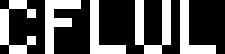

In [74]:
using Images
Gray.(ans)

# Day 9

In [31]:
include("Intcode.jl")
input = parse.(Int,split(readline("input9.txt"), ","))

973-element Array{Int64,1}:
     1102
 34463338
 34463338
       63
     1007
       63
 34463338
       63
     1005
       63
       53
     1102
        3
        ⋮
     1105
        1
      968
    21201
       -2
        0
       -2
      109
       -3
     2105
        1
        0

In [35]:
@time let cpu = Intcode(input)
    enqueue!(cpu.input, 1)
    while !isdone(cpu)
        next!(cpu)
    end
    @show collect(cpu.output)
end

collect(cpu.output) = [2351176124]
  0.000606 seconds (9.28 k allocations: 228.359 KiB)


1-element Array{Int64,1}:
 2351176124

In [36]:
@time let cpu = Intcode(input)
    enqueue!(cpu.input, 2)
    while !isdone(cpu)
        next!(cpu)
    end
    @show collect(cpu.output)
end

collect(cpu.output) = [73110]
  0.953379 seconds (14.42 M allocations: 263.429 MiB, 28.06% gc time)


1-element Array{Int64,1}:
 73110

# Day 10

In [220]:
input = vcat([[c == '#' for c in line] |> permutedims for line in eachline("input10.txt")]...)

26×26 Array{Bool,2}:
  true   true  false   true  false  …   true   true   true   true   true
  true  false  false   true   true     false   true   true   true  false
 false  false   true  false   true     false  false  false   true   true
 false   true   true  false  false      true  false  false  false  false
  true  false   true   true   true      true  false  false   true  false
 false  false   true  false  false  …  false   true  false   true   true
  true  false  false  false   true     false   true  false   true  false
 false   true  false  false   true      true  false  false   true   true
 false  false  false  false  false     false   true   true   true   true
 false   true   true  false   true     false   true   true   true   true
 false  false   true  false   true  …   true  false  false  false  false
 false  false  false  false   true      true  false   true   true   true
  true   true   true  false   true      true   true   true  false  false
  true   true   true  false   

In [221]:
function count_visibile(x, y)
    S = Set{Pair{Int,Int}}()
    for i = 1:size(input)[1], j = 1:size(input)[2]
        if input[i,j] && (i,j) != (y,x)
            dx = j - x
            dy = i - y
            dx,dy = dx ÷ gcd(dx,dy), dy ÷ gcd(dx,dy)
            push!(S, dx => dy)
        end
    end
    return length(S)
end

count_visibile (generic function with 1 method)

In [222]:
A = [input[i,j] ? count_visibile(j, i) : 0 for i = 1:size(input)[1], j = 1:size(input)[2]]

26×26 Array{Int64,2}:
 266  261    0  267    0    0  264    0  …    0  261  263  264  265  261  253
 270    0    0  259  278  272  264  269       0  283    0  281  264  267    0
   0    0  273    0  280  278  275  273       0  275    0    0    0  268  266
   0  266  277    0    0  265    0  263     267    0  266    0    0    0    0
 260    0  271  272  269  264    0    0     267    0  258    0    0  265    0
   0    0  283    0    0  270    0  268  …    0    0    0  274    0  270  257
 271    0    0    0  270  268  276  272     274    0    0  266    0  271    0
   0  263    0    0  278    0  267  268     268  271  261    0    0  271  256
   0    0    0    0    0    0  274  275       0    0    0  266  275  274  262
   0  261  278    0  266    0    0    0       0  270    0  263  264  264  252
   0    0  271    0  273    0  271    0  …  269    0  258    0    0    0    0
   0    0    0    0  280  271  279  266       0  277  261    0  267  278  258
 268  266  270    0  262  266  276  267   

In [223]:
findmax(A)

(284, CartesianIndex(20, 21))

In [ ]:
f(tpl) = atan(-tpl[2],-tpl[1])

In [224]:
points = let angles = Dict{Tuple{Int,Int}, Vector{Tuple{Int,Int}}}()
    y,x = 20,21
    for i = 1:size(input)[1], j = 1:size(input)[2]
        if input[i,j] && (i,j) != (y,x)
            dx = j - x
            dy = y - i
            dx,dy = dx ÷ gcd(dx,dy), dy ÷ gcd(dx,dy)
            
            if !haskey(angles, (dy,dx))
                angles[(dy,dx)] = [(i,j)]
            else
                push!(angles[(dy,dx)], (i,j))
            end
        end
    end
    
    for (k,v) in angles
        sort!(v, by=tpl -> magnitude(tpl .- (y,x)), rev=true)
    end
    
    sort(angles, by = tpl -> f(normalize(tpl)))
end

OrderedDict{Tuple{Int64,Int64},Array{Tuple{Int64,Int64},1}} with 284 entries:
  (1, 0)  => Tuple{Int64,Int64}[(1, 21), (2, 21), (3, 21), (8, 21), (10, 21), (…
  (19, 1) => Tuple{Int64,Int64}[(1, 22)]
  (16, 1) => Tuple{Int64,Int64}[(4, 22)]
  (15, 1) => Tuple{Int64,Int64}[(5, 22)]
  (12, 1) => Tuple{Int64,Int64}[(8, 22)]
  (19, 2) => Tuple{Int64,Int64}[(1, 23)]
  (9, 1)  => Tuple{Int64,Int64}[(2, 23), (11, 22)]
  (8, 1)  => Tuple{Int64,Int64}[(12, 22)]
  (7, 1)  => Tuple{Int64,Int64}[(6, 23), (13, 22)]
  (13, 2) => Tuple{Int64,Int64}[(7, 23)]
  (19, 3) => Tuple{Int64,Int64}[(1, 24)]
  (6, 1)  => Tuple{Int64,Int64}[(2, 24)]
  (11, 2) => Tuple{Int64,Int64}[(9, 23)]
  (5, 1)  => Tuple{Int64,Int64}[(10, 23), (15, 22)]
  (19, 4) => Tuple{Int64,Int64}[(1, 25)]
  (9, 2)  => Tuple{Int64,Int64}[(2, 25)]
  (17, 4) => Tuple{Int64,Int64}[(3, 25)]
  (4, 1)  => Tuple{Int64,Int64}[(16, 22)]
  (19, 5) => Tuple{Int64,Int64}[(1, 26)]
  (15, 4) => Tuple{Int64,Int64}[(5, 25)]
  (11, 3) => Tuple{Int64,Int6

In [225]:
order = let arr = Tuple{Int,Int}[]
    while any(!isempty, values(points))
        for (k,v) in points
            if !isempty(v)
                push!(arr, pop!(v))
            end
        end
    end
    arr
end

385-element Array{Tuple{Int64,Int64},1}:
 (19, 21)
 (1, 22) 
 (4, 22) 
 (5, 22) 
 (8, 22) 
 (1, 23) 
 (11, 22)
 (12, 22)
 (13, 22)
 (7, 23) 
 (1, 24) 
 (2, 24) 
 (9, 23) 
 ⋮       
 (2, 12) 
 (8, 21) 
 (20, 9) 
 (1, 2)  
 (3, 21) 
 (20, 8) 
 (2, 21) 
 (20, 6) 
 (1, 21) 
 (20, 4) 
 (20, 3) 
 (20, 1) 

In [227]:
let (y,x) = order[200]
    100 * (y - 1) + x - 1
end

404

# Day 11

In [293]:
using Images
include("Intcode.jl")
input = parse.(Int,split(readline("input11.txt"), ","))

637-element Array{Int64,1}:
     3
     8
  1005
     8
   315
  1106
     0
    11
     0
     0
     0
   104
     1
     ⋮
    -2
    -1
    -2
 22201
    -4
    -2
    -4
   109
    -5
  2106
     0
     0

length(paint) = 249


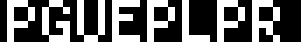

In [291]:
let cpu = Intcode(input)
    i,j = 0,0
    dir = 0
    paint = Dict( (i => j) => true ) # false for part 1
    
    while !isdone(cpu)
        enqueue!(cpu.input, get(paint, i => j, false) ? 1 : 0)
        while length(cpu.output) < 2
            if isdone(cpu)
                break
            end
            next!(cpu)
        end
        
        if isdone(cpu) && isempty(cpu.output)
            break
        end
        
        
        c = dequeue!(cpu.output) == 1
        Δdir = dequeue!(cpu.output) * 2 - 1
        
        paint[i => j] = c
        
        dir = mod(dir + Δdir, 4)
        if dir == 0
            i -= 1
        elseif dir == 1
            j += 1
        elseif dir == 2
            i += 1
        elseif dir == 3
            j -= 1
        end
    end
    
    @show length(paint) # part 1
    
    minI,maxI = extrema(first.(keys(paint)))
    minJ,maxJ = extrema(last.(keys(paint)))
    
    img = [Gray(get(paint, i => j, false)) for i in minI:maxI, j in minJ:maxJ] # part 2
end

# Day 12

In [1]:
function parseMoon(str)
    m = match(r"<x=(-?\d+), y=(-?\d+), z=(-?\d+)>", str)
    parse.(Int, m.captures)
end

parseMoon (generic function with 1 method)

In [130]:
input = parseMoon.(eachline("input12.txt"))

4-element Array{Array{Int64,1},1}:
 [3, 15, 8] 
 [5, -1, -2]
 [-10, 8, 2]
 [8, 4, -5] 

In [69]:
mutable struct Moon
    pos::Vector{Int}
    vel::Vector{Int}
end

Base.:(==)(moonA::Moon, moonB::Moon) = ==(moonA.pos, moonB.pos) && ==(moonA.vel, moonB.vel)
Base.hash(moon::Moon) = Base.hash((moon.pos, moon.vel))
Base.hash(moons::Vector{Moon}) = reduce(hash, hash.(moons))


kinectic_energy(moon::Moon) = sum(abs(x) for x in moon.vel)
potential_energy(moon::Moon) = sum(abs(x) for x in moon.pos)
energy(moon::Moon) = potential_energy(moon) * kinectic_energy(moon)

gravity(moonA::Moon, moonB::Moon) = [ cmp(xB,xA) for (xA,xB) in zip(moonA.pos, moonB.pos) ]

gravity (generic function with 1 method)

In [61]:
function apply_gravity!(moons)
    for (i,moon) in enumerate(moons)
        moon.vel += sum(gravity(moon, other) for (j,other) in enumerate(moons) if i != j)
    end
    moons
end

apply_gravity! (generic function with 1 method)

In [5]:
function apply_velocity!(moons)
    for moon in moons
        moon.pos += moon.vel
    end
    moons
end

apply_velocity! (generic function with 1 method)

In [84]:
let moons = [Moon(pos, [0,0,0]) for pos in input]
    for i = 1:1000
        apply_gravity!(moons)
        apply_velocity!(moons)
    end
    E = sum(energy(moon) for moon in moons)
    @show E
end

E = 7179


7179

In [123]:
function find_component_cycle(positions::Tuple{Int,Int,Int,Int})
    velocities = (0,0,0,0)
    history = Dict{Pair{Tuple{Int,Int,Int,Int},Tuple{Int,Int,Int,Int}}, Int}()
    for i = 1:1000000
        if haskey(history, positions=>velocities)
            return history[positions => velocities]:i-1
        end
        history[positions => velocities] = i
        
        velocities = tuple([ vel + sum(cmp(other, moon) for other in positions) for (moon,vel) in zip(positions,velocities) ]...)
        positions = positions .+ velocities
    end
    
    throw("Period too long")
end

find_component_cycle (generic function with 2 methods)

In [131]:
@time periods = [find_component_cycle(tuple([pos[i] for pos in input]...)) for i = 1:3]

  1.999894 seconds (9.29 M allocations: 593.946 MiB, 29.12% gc time)


3-element Array{UnitRange{Int64},1}:
 1:231614
 1:144624
 1:102356

In [132]:
lcm(length.(periods)...)

428576638953552

# Day 13

In [148]:
using Images, IJulia
include("Intcode.jl")
input = parse.(Int,split(readline("input13.txt"), ","))

2710-element Array{Int64,1}:
      1
    380
    379
    385
   1008
   2709
 526488
    381
   1005
    381
     12
     99
    109
      ⋮
     44
     49
     29
     90
     89
     20
     36
     95
     22
     71
     82
 526488

In [144]:
colors = [
    RGB(0,0,0),
    RGB(0.3,0.3,0.3),
    RGB(1,1,1),
    RGB(0,1,0),
    RGB(1,0,0),
]

count((==)(2), values(locationDict)) = 357
(minX, maxX) = (0, 44)
(minY, maxY) = (0, 22)


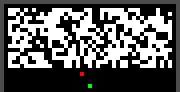

In [146]:
let cpu = Intcode(input)
    while !isdone(cpu)
        next!(cpu)
    end
    
    locationDict = Dict(
        (x,y) => typ for (x,y,typ) in Iterators.partition(cpu.output, 3)
    )
    
    @show count(==(2), values(locationDict))

    minX,maxX = extrema(first.(keys(locationDict)))
    minY,maxY = extrema(last.(keys(locationDict)))
    
    @show minX,maxX
    @show minY,maxY
    
    [colors[get(locationDict, (x,y), 0) + 1] for y = minY:maxY, x = minX:maxX]
end

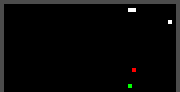

score = 17468
  8.416570 seconds (28.40 M allocations: 683.113 MiB, 7.88% gc time)


17468

In [158]:
@time let cpu = Intcode(input)
    
    image = fill(colors[1], 23, 45)
    score = 0
    
    ballPos = 0
    paddlePos = 0
    
    frames = 0
    
    
    cpu.memory[1] = 2
    while !isdone(cpu)
        while length(cpu.output) >= 3
            x,y,typ = [dequeue!(cpu.output) for i = 1:3]
            if x == -1 && y == 0
                score = typ
            else
                image[y+1,x+1] = colors[typ+1]
                if typ == 3
                    paddlePos = x
                elseif typ == 4
                    ballPos = x
                end
            end 
        end
        
        if needsinput(cpu)
            enqueue!(cpu.input, cmp(ballPos, paddlePos))
            
             if frames % 3 == 0 && (frames ÷ 100) % 10 == 0
                 IJulia.clear_output(true)
                 display(image)
             end
            
             frames += 1
        end
        
        next!(cpu)
    end
    
    @show score
end

# Day 14

In [169]:
const Chemical = Pair{String, Int}
const Chemicals = Dict{String, Int}
const Recipe = Pair{Chemicals, Chemical}

Pair{Dict{String,Int64},Pair{String,Int64}}

In [175]:
function parse_chemical(s)
    count, name = split(s)
    name => parse(Int, count)
end

function parse_reaction(line)::Recipe
    left,right = split(line, " => ")
    reactants = Dict(parse_chemical(s) for s in split(left, ", "))
    product = parse_chemical(right)
    
    reactants => product
end

parse_reaction (generic function with 1 method)

In [233]:
reactions = Dict( ((r,p) = parse_reaction(line); first(p) => r => p) for line in eachline("input14.txt") )

Dict{String,Pair{Dict{String,Int64},Pair{String,Int64}}} with 64 entries:
  "VTGNT" => Dict("JQCZ"=>1)=>("VTGNT"=>4)
  "MGFZ"  => Dict("JQNGL"=>6)=>("MGFZ"=>6)
  "JQCZ"  => Dict("KWQSC"=>1,"KBRD"=>14)=>("JQCZ"=>4)
  "DWKLT" => Dict("FTND"=>1)=>("DWKLT"=>7)
  "KWZKV" => Dict("VTGNT"=>10,"JTPF"=>4)=>("KWZKV"=>9)
  "TPJP"  => Dict("NSPQ"=>5)=>("TPJP"=>3)
  "HWFQ"  => Dict("ZNBSN"=>26,"LCZD"=>1,"KMLKR"=>1,"QNKZW"=>11,"FTND"=>3,"PNRC"…
  "MBGWZ" => Dict("PFBF"=>1,"KBLHZ"=>3)=>("MBGWZ"=>3)
  "KMLKR" => Dict("MJMC"=>2)=>("KMLKR"=>2)
  "DNPT"  => Dict("ZNBSN"=>2)=>("DNPT"=>4)
  "JGTR"  => Dict("ORE"=>134)=>("JGTR"=>3)
  "PNPW"  => Dict("VTJC"=>2)=>("PNPW"=>7)
  "NLSNC" => Dict("PNPW"=>6,"NSPQ"=>7)=>("NLSNC"=>7)
  "KWQPL" => Dict("TNWR"=>3)=>("KWQPL"=>9)
  "MJMC"  => Dict("XHPK"=>2,"NHQW"=>4)=>("MJMC"=>1)
  "JTPF"  => Dict("TMTNM"=>3)=>("JTPF"=>8)
  "MXGQ"  => Dict("SQCB"=>10)=>("MXGQ"=>5)
  "ZQRBC" => Dict("DHTB"=>2,"NLSNC"=>1,"SXKC"=>14)=>("ZQRBC"=>1)
  "NSTR"  => Dict("KWZKV"=>1,"MJMC"=>2,"S

In [235]:
function ore_count(chem::Chemical, resources = Chemicals())
    name,count = chem
    
    if name == "ORE"
        return count
    end
    
    if haskey(resources, name)
        spares = min(count, resources[name])
        count -= spares
        resources[name] -= spares
    end
    
    if count <= 0
        return 0
    end
    
    reactants, product = reactions[name]
    
    nreactions = ceil(count / last(product)) |> Int
    spare = nreactions * last(product) - count
    
    ore = sum(reactants) do (reactant, rcount)
        ore = ore_count(reactant => nreactions*rcount, resources)
        #println("$(nreactions*rcount) $reactant = $ore ORE")
        ore
    end
    
    resources[name] = get(resources,name,0) + spare
    return ore
end

ore_count (generic function with 2 methods)

In [244]:
oneCount = ore_count("FUEL" => 1)

143173

In [281]:
function binary_search(f, r)
    if length(r) == 1
        first(r)
    elseif length(r) == 2
        f(last(r)) ? last(r) : first(r)
    else
        m = r[(length(r)+1) ÷ 2]
        if f(m)
            binary_search(f, m:last(r))
        else
            binary_search(f, first(r):m-1)
        end
    end
end

binary_search (generic function with 1 method)

In [282]:
binary_search(1:10000000) do n
    ore_count("FUEL" => n) <= 10^12
end

8845261

# Day 15

In [3]:
using Images, DataStructures
include("Intcode.jl")
input = parse.(Int,split(readline("input15.txt"), ","))

1045-element Array{Int64,1}:
    3
 1033
 1008
 1033
    1
 1032
 1005
 1032
   31
 1008
 1033
    2
 1032
    ⋮
    0
   21
   21
    1
   10
    1
    0
    0
    0
    0
    0
    0

In [4]:
const directions = [
    (0,-1), # NORTH
    (0,+1), # SOUTH
    (+1,0), # EAST
    (-1,0), # WEST
]

4-element Array{Tuple{Int64,Int64},1}:
 (0, -1)
 (0, 1) 
 (1, 0) 
 (-1, 0)

In [5]:
function tryMove(cpu, direction)
    enqueue!(cpu.input, direction)
    while isempty(cpu.output)
            @assert !isdone(cpu)
            @assert !(needsinput(cpu) && isempty(cpu.input))
            next!(cpu)
    end
    dequeue!(cpu.output)
end

tryMove (generic function with 1 method)

In [11]:
struct SavedState
    steps::Int
    memory::Vector{Int}
    pos::Tuple{Int,Int}
end
Base.isless(a::SavedState, b::SavedState) = Base.isless(a.steps, b.steps)

In [32]:
walls,oxygenPos = let states = [SavedState(0, input, (0,0))]
    visited = Set{Tuple{Int,Int}}()
    walls = Set{Tuple{Int,Int}}()
    oxygenPos = nothing
    while !isempty(states)
        state = heappop!(states)
        
        for (i,dir) in enumerate(directions)
            newPos = state.pos .+ dir
            
            if newPos in visited || newPos in walls
                continue
            end
            
            let cpu = Intcode(state.memory)
                status = tryMove(cpu,i)
                if status == 0
                    push!(walls, newPos)
                else
                    newState = SavedState(state.steps+1, Int.(cpu.memory), newPos)
                    heappush!(states, newState)
                    if status == 2
                        oxygenPos = newPos
                        println("Found oxygen $newPos ($(newState.steps) steps)")
                    end
                end
            end
        end
        push!(visited,state.pos)
    end
    
    walls,oxygenPos
end

Found oxygen (-18, -20) (330 steps)


(Set(Tuple{Int64,Int64}[(15, -17), (-4, 5), (21, 13), (-5, -13), (-19, -14), (-10, -13), (-19, -5), (-9, 19), (19, -9), (-8, 19)  …  (5, -5), (-2, 5), (-5, 19), (11, -19), (3, -2), (7, -2), (4, -7), (-18, 17), (-5, -17), (-17, -1), (15, -19)]), (-18, -20))

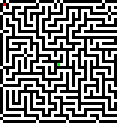

In [34]:
minX,maxX = extrema(first.(walls))
minY,maxY = extrema(last.(walls))

f(x,y) = if (x,y) in walls
            RGB(0,0,0)
        elseif (x,y) == oxygenPos
            RGB(1,0,0)
        elseif (x,y) == (0,0)
            RGB(0,1,0)
        else
            RGB(1,1,1)
        end

[f(j,i) for i = minY:maxY, j = minX:maxY]

In [36]:
let open = [0 => oxygenPos]
    visited = Set{Tuple{Int,Int}}()
    
    while !isempty(open)
        dist, pos = heappop!(open)
        for d in directions
            newPos = pos .+ d
            if newPos in walls || newPos in visited
                continue
            end
            heappush!(open, dist+1 => newPos)
        end
        push!(visited, pos)
        
        if isempty(open)
            @show dist
        end
    end
end

dist = 352


In [357]:
backups

Dict{Pair{Int64,Int64},Pair{Int64,Array{Int64,1}}} with 6 entries:
  2=>-1 => 3=>[3, 1033, 1008, 1033, 1, 1032, 1005, 1032, 31, 1008  …  20, 1, 10…
  2=>-3 => 5=>[3, 1033, 1008, 1033, 1, 1032, 1005, 1032, 31, 1008  …  18, 1, 9,…
  1=>0  => 1=>[3, 1033, 1008, 1033, 1, 1032, 1005, 1032, 31, 1008  …  21, 0, 10…
  2=>-2 => 4=>[3, 1033, 1008, 1033, 1, 1032, 1005, 1032, 31, 1008  …  19, 1, 9,…
  0=>0  => 0=>[3, 1033, 1008, 1033, 1, 1032, 1005, 1032, 31, 1008  …  21, 1, 10…
  2=>0  => 2=>[3, 1033, 1008, 1033, 1, 1032, 1005, 1032, 31, 1008  …  21, 1, 10…

# Day 16

In [336]:
input = parse.(Int,readline("input16.txt") |> collect)
len = 10_000 * length(input)
offset = parse(Int, join(input[1:7]))

5971981

In [337]:
len,offset

(6500000, 5971981)

In [338]:
@time let A = getDigit.(0,offset:len)
    for n = 1:100
        for i = length(A)-1:-1:1
            A[i] = (A[i] + A[i+1]) % 10
        end
        A = abs.(A)
    end
    A[2:9] |> join
end

 12.517555 seconds (212.86 M allocations: 4.356 GiB, 6.38% gc time)


"62938399"

In [103]:
basePattern = [0,1,0,-1]
M = reduce(hcat, collect(Iterators.take(Iterators.drop(Iterators.cycle(RepeaterIterator(basePattern, i)), 1), length(input))) for i = 1:length(input))' |> collect

650×650 Array{Int64,2}:
 1  0  -1  0  1   0  -1  0   1   0  -1  …   0  -1   0   1   0  -1  0   1   0
 0  1   1  0  0  -1  -1  0   0   1   1      1   1   0   0  -1  -1  0   0   1
 0  0   1  1  1   0   0  0  -1  -1  -1      0   0   0  -1  -1  -1  0   0   0
 0  0   0  1  1   1   1  0   0   0   0      0   0   1   1   1   1  0   0   0
 0  0   0  0  1   1   1  1   1   0   0      0   0   0   1   1   1  1   1   0
 0  0   0  0  0   1   1  1   1   1   1  …  -1  -1  -1  -1  -1  -1  0   0   0
 0  0   0  0  0   0   1  1   1   1   1     -1  -1   0   0   0   0  0   0   0
 0  0   0  0  0   0   0  1   1   1   1      0   0   0   0   0   0  1   1   1
 0  0   0  0  0   0   0  0   1   1   1     -1  -1  -1  -1  -1  -1  0   0   0
 0  0   0  0  0   0   0  0   0   1   1      0   0   0   0   0   0  0   0   1
 0  0   0  0  0   0   0  0   0   0   1  …   0   0   0   0   0   0  0  -1  -1
 0  0   0  0  0   0   0  0   0   0   0      1   1   1   1   1   1  0   0   0
 0  0   0  0  0   0   0  0   0   0   0      1   1   

In [340]:
@time let v = input
    for i = 1:100
        v = abs.(M * v) .% 10
    end
    v[1:8] |> join
end

  0.028962 seconds (622 allocations: 1.034 MiB)


"30550349"

# Day 17

In [84]:
include("Intcode.jl")
input = parse.(Int,split(readline("input17.txt"), ","))

1491-element Array{Int64,1}:
    1
  330
  331
  332
  109
 4286
 1102
    1
 1182
   16
 1101
 1491
    0
    ⋮
    1
   32
    1
    9
    1
   32
    1
    9
    1
   32
   11
   20

In [34]:
grid = let cpu = Intcode(input)
    while !isdone(cpu) && !needsinput(cpu)
        next!(cpu)
    end
    lines = UInt8.(collect(cpu.output)) |> String |> split
    reduce(hcat, collect.(lines)) |> permutedims
end

65×43 Array{Char,2}:
 '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'  …  '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'  …  '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '#'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '#'  '#'  '#'  '#'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'  …  '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  '.'  '.'
 '.'  '.'  '.'  '.'  '.'  '.'  '.'  '.'    

In [35]:
h,w = size(grid)

(65, 43)

In [36]:
intersections = collect((i,j) for i = 2:h-1, j = 2:w-1 if '#' == grid[i,j] == grid[i+1,j] == grid[i-1,j] == grid[i,j+1] == grid[i,j-1])

11-element Array{Tuple{Int64,Int64},1}:
 (49, 3) 
 (53, 11)
 (35, 13)
 (57, 13)
 (9, 15) 
 (35, 15)
 (13, 17)
 (29, 17)
 (29, 23)
 (17, 25)
 (27, 27)

In [37]:
sum((i-1)*(j-1) for (i,j) in intersections)

4600

In [44]:
let (i,j) = Tuple(findfirst(==('^'), grid))
    @show i,j
    grid[i-1:i+1,j-1:j]
end

(i, j) = (17, 43)


3×2 Array{Char,2}:
 '.'  '.'
 '#'  '^'
 '.'  '.'

In [70]:
let path = Union{Int,Char}[]
    dir = -1, 0
    i, j = 17, 43
    count = 0
    while true
        newI,newJ = (i,j) .+ dir
        if newI in 1:size(grid,1) && newJ in 1:size(grid,2) && grid[newI,newJ] == '#'
            i,j = newI, newJ
            count += 1
            #push!(path, 1)
            continue
        end
        
        count == 0 || push!(path, count)
        count = 0
        
        dirLeft = (-dir[2], dir[1])
        newI,newJ = (i,j) .+ dirLeft
        if newI in 1:size(grid,1) && newJ in 1:size(grid,2) && grid[newI,newJ] == '#'
            push!(path, 'L')
            dir = dirLeft
            continue
        end

        dirRight = (dir[2], -dir[1])
        newI,newJ = (i,j) .+ dirRight
        if newI in 1:size(grid,1) && newJ in 1:size(grid,2) && grid[newI,newJ] == '#'
            push!(path, 'R')
            dir = dirRight
            continue
        end            
        break
    end
    path
end

66-element Array{Union{Char, Int64},1}:
   'L'
 12   
   'L'
 10   
   'R'
  8   
   'L'
 12   
   'R'
  8   
   'R'
 10   
   'R'
  ⋮   
   'R'
  8   
   'R'
 10   
   'R'
 12   
   'L'
 10   
   'R'
 12   
   'R'
  8   

In [71]:
join(string.(ans),',')

"L,12,L,10,R,8,L,12,R,8,R,10,R,12,L,12,L,10,R,8,L,12,R,8,R,10,R,12,L,10,R,12,R,8,L,10,R,12,R,8,R,8,R,10,R,12,L,12,L,10,R,8,L,12,R,8,R,10,R,12,L,10,R,12,R,8"

In [80]:
A = "L,12,L,10,R,8,L,12"
B = "R,8,R,10,R,12"
C = "L,10,R,12,R,8"
main = "A,B,A,B,C,C,B,A,B,C"

"A,B,A,B,C,C,B,A,B,C"

In [87]:
let cpu = Intcode(input)
    cpu.memory[1] = 2
    inputStr = join([main,A,B,C,"n\n"], '\n')
    for c in inputStr
        enqueue!(cpu.input, UInt8(c))
    end
    while !isdone(cpu)
        next!(cpu)
    end
    collect(cpu.output) |> last 
end

1113411

# Day 18

In [1]:
using DataStructures
maze = permutedims(reduce(hcat, collect.(readlines("input18.txt"))))

81×81 Array{Char,2}:
 '#'  '#'  '#'  '#'  '#'  '#'  '#'  '#'  …  '#'  '#'  '#'  '#'  '#'  '#'  '#'
 '#'  '.'  '.'  '.'  '.'  '.'  '.'  '.'     '.'  '.'  '.'  '.'  '.'  't'  '#'
 '#'  '.'  '#'  '#'  '#'  '#'  '#'  '#'     '#'  '#'  '#'  '#'  '#'  '.'  '#'
 '#'  '.'  '.'  '.'  'Z'  '.'  '.'  '.'     '#'  '.'  '#'  '.'  '.'  '.'  '#'
 '#'  '.'  '#'  '#'  '#'  '#'  '#'  '.'     '#'  '.'  '#'  '.'  '#'  '#'  '#'
 '#'  '.'  '#'  '.'  '.'  '.'  '.'  '.'  …  '#'  '.'  '.'  '.'  '#'  '.'  '#'
 '#'  '.'  '#'  '.'  '#'  '.'  '#'  '#'     '#'  '.'  '#'  '#'  '#'  '.'  '#'
 '#'  '.'  '#'  '.'  '#'  '.'  '#'  '.'     '#'  '.'  '#'  '.'  '.'  '.'  '#'
 '#'  '.'  '#'  '.'  '#'  '#'  '#'  '.'     '#'  '.'  '#'  '.'  '#'  '.'  '#'
 '#'  '.'  '#'  '.'  '.'  '.'  '#'  '.'     '#'  '.'  '#'  '.'  '#'  '.'  '#'
 '#'  '.'  '#'  '#'  '#'  '.'  '#'  '.'  …  '#'  '.'  '#'  '.'  '#'  '.'  '#'
 '#'  '.'  '#'  '.'  '.'  '.'  '#'  '.'     '.'  '.'  '.'  '.'  '#'  '.'  '#'
 '#'  '.'  '#'  '.'  '#'  '#'  '#'  '.'    

In [6]:
keyLocations = Dict(
    maze[idx] => Tuple(idx) for idx in keys(maze) if islowercase(maze[idx])
)
doorLocations = Dict(
    maze[idx] => Tuple(idx) for idx in keys(maze) if isuppercase(maze[idx])
)
points = merge(keyLocations, doorLocations, Dict('@' => Tuple(findfirst(==('@'), maze))))

Dict{Char,Tuple{Int64,Int64}} with 53 entries:
  'w' => (14, 72)
  'E' => (26, 5)
  'Z' => (4, 5)
  'o' => (32, 20)
  'B' => (2, 67)
  'h' => (32, 80)
  'i' => (14, 80)
  'r' => (80, 16)
  'q' => (12, 60)
  'P' => (64, 13)
  'K' => (32, 71)
  'I' => (76, 3)
  'H' => (27, 10)
  'a' => (54, 6)
  'c' => (68, 6)
  'p' => (58, 76)
  'U' => (15, 40)
  'x' => (20, 70)
  'u' => (68, 40)
  'V' => (3, 40)
  'd' => (20, 78)
  '@' => (41, 41)
  'e' => (26, 74)
  'D' => (30, 21)
  'j' => (22, 22)
  ⋮   => ⋮

In [22]:
pointsOrder = points |> keys |> collect |> sort

53-element Array{Char,1}:
 '@'
 'A'
 'B'
 'C'
 'D'
 'E'
 'F'
 'G'
 'H'
 'I'
 'J'
 'K'
 'L'
 ⋮  
 'o'
 'p'
 'q'
 'r'
 's'
 't'
 'u'
 'v'
 'w'
 'x'
 'y'
 'z'

In [48]:
struct State
    pos::Char
    keys::UInt32
end

In [13]:
dirs = [(0,-1),(0,+1),(-1,0),(+1,0)]
dist(a, b) = abs.(a .- b) |> sum

dist (generic function with 1 method)

In [73]:
function valid(s::State)
    if s.pos in 'A':'Z'
        i = s.pos - 'A'
        s.keys & (1 << i) != 0
    else
        true
    end
end

valid (generic function with 1 method)

In [50]:
done(s::State) = s.keys == 2^26-1

done (generic function with 1 method)

In [52]:
function hval(s::State)
    0
end

hval (generic function with 1 method)

In [11]:
struct WithFScore{T}
    fScores::Dict{Tuple{Int,Int},Int}
    s::T
end
Base.isless(a::WithFScore{T}, b::WithFScore{T}) where {T} = a.fScores[a.s] < b.fScores[b.s]

In [25]:
function shortest_path(source, destination)
    gScores = Dict{Tuple{Int,Int},Int}(source => 0)
    fScores = Dict{Tuple{Int,Int},Int}(source => dist(source, destination))

    open = [WithFScore(fScores, source)]
    while !isempty(open)
        s = heappop!(open).s
        if s == destination
            return gScores[s]
        end
        for dir in dirs
            newS = s .+ dir
            if maze[CartesianIndex(newS)] == '.' || newS == destination
                tentative_gScore = gScores[s] + 1
                if !haskey(gScores, newS) || tentative_gScore < gScores[newS]
                    if !haskey(fScores, newS)
                        fScores[newS] = tentative_gScore + dist(newS, destination)
                    end
                    gScores[newS] = tentative_gScore

                    sortedS = WithFScore(fScores, newS)
                    if !(sortedS in open)
                        heappush!(open, sortedS)
                    end
                end
            end
        end
    end
    Inf
end

shortest_path (generic function with 1 method)

In [46]:
weights = Dict(
    srcK => Dict(
        Iterators.filter(x->x[1] != srcK && x[2] isa Int, dstK => shortest_path(srcV, dstV) for (dstK,dstV) in points)
    ) for (srcK,srcV) in points
)

Dict{Char,Dict{Char,Int64}} with 53 entries:
  'w' => Dict('d'=>20,'q'=>22)
  'E' => Dict('H'=>26,'X'=>18)
  'Z' => Dict('k'=>39,'C'=>22)
  'o' => Dict('N'=>195,'m'=>116,'g'=>36,'@'=>30,'R'=>141,'G'=>53,'T'=>181,'O'=>…
  'B' => Dict('n'=>31,'t'=>13,'R'=>16)
  'h' => Dict('K'=>43,'x'=>30,'e'=>20)
  'i' => Dict('t'=>28)
  'r' => Dict('M'=>5,'v'=>28)
  'q' => Dict('J'=>25,'w'=>22)
  'P' => Dict('L'=>14,'a'=>47)
  'K' => Dict('n'=>133,'h'=>43)
  'I' => Dict('c'=>23,'u'=>139,'G'=>158)
  'H' => Dict('E'=>26,'k'=>61)
  'a' => Dict('P'=>47,'y'=>20)
  'c' => Dict('I'=>23,'y'=>38)
  'p' => Dict('A'=>25,'l'=>20)
  'U' => Dict('g'=>37,'V'=>18,'F'=>146)
  'x' => Dict('h'=>30,'s'=>26,'e'=>42)
  'u' => Dict('I'=>139,'v'=>24,'G'=>23)
  'V' => Dict('U'=>18,'F'=>162)
  'd' => Dict('w'=>20,'s'=>10)
  '@' => Dict('b'=>124,'N'=>165,'m'=>88,'g'=>18,'o'=>30,'R'=>113,'G'=>25,'O'=>3…
  'e' => Dict('h'=>20,'x'=>42)
  'D' => Dict('W'=>12,'S'=>20)
  'j' => Dict('Q'=>15)
  ⋮   => ⋮

In [53]:
struct SortedState
    fScores::Dict{State,Int}
    s::State
end
Base.isless(a::SortedState, b::SortedState) = a.fScores[a.s] < b.fScores[b.s]

In [76]:
let start = State('@', 0)
    gScores = Dict{State,Int}(start => 0)
    fScores = Dict{State,Int}(start => hval(start))

    open = [SortedState(fScores, start)]
    while !isempty(open)
        s = heappop!(open).s
        if done(s)
            @show gScores[s],s
            break
        end
        for (pos,dist) in weights[s.pos]
            keys = if pos in 'a':'z'
                s.keys | (1 << (pos - 'a'))
            else
                s.keys
            end
            newS = State(pos,keys)

            if valid(newS)
                tentative_gScore = gScores[s] + dist
                if !haskey(gScores, newS) || tentative_gScore < gScores[newS]
                    if !haskey(fScores, newS)
                        fScores[newS] = tentative_gScore + hval(newS)
                    end
                    gScores[newS] = tentative_gScore

                    sortedS = SortedState(fScores, newS)
                    if !(sortedS in open)
                        heappush!(open, sortedS)
                    end
                end
            end
        end
    end
end

(gScores[s], s) = (4042, State('j', 0x03ffffff))


In [25]:
hScores

Dict{State,Int64} with 50034 entries:
  State((9, 54), 0x00320042)  => 339
  State((77, 50), 0x00004040) => 425
  State((68, 47), 0x00005040) => 397
  State((42, 53), 0x00004040) => 447
  State((11, 48), 0x00101040) => 357
  State((4, 52), 0x00305040)  => 360
  State((43, 22), 0x00001040) => 391
  State((62, 52), 0x00001000) => 460
  State((74, 76), 0x00300040) => 424
  State((32, 25), 0x00300040) => 371
  State((37, 48), 0x00100042) => 385
  State((34, 26), 0x00000042) => 380
  State((54, 36), 0x00000040) => 408
  State((8, 50), 0x00000040)  => 378
  State((46, 16), 0x00304040) => 394
  State((52, 50), 0x00000000) => 472
  State((52, 34), 0x00301042) => 402
  State((58, 26), 0x00320040) => 378
  State((71, 20), 0x00325040) => 349
  State((46, 8), 0x00000002)  => 426
  State((74, 48), 0x00320040) => 372
  State((50, 2), 0x00320042)  => 342
  State((59, 42), 0x00100042) => 415
  State((32, 80), 0x023298e2) => 274
  State((52, 20), 0x00005042) => 396
  ⋮                           => ⋮

# Day 19

In [77]:
include("Intcode.jl")
input = parse.(Int,split(readline("input19.txt"), ","))

424-element Array{Int64,1}:
   109
   424
   203
     1
 21101
    11
     0
     0
  1106
     0
   282
 21102
     1
     ⋮
    -3
    -2
     1
 22102
     1
     1
    -4
   109
    -5
  2105
     1
     0

In [84]:
beamMap = [let cpu = Intcode(input)
    enqueue!(cpu.input, i)
    enqueue!(cpu.input, j)
    while !isdone(cpu)
        next!(cpu)
    end
    dequeue!(cpu.output)
end for i = 0:49, j = 0:49]

50×50 Array{Int64,2}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0    

In [85]:
sum(beamMap)

118

In [86]:
println.(join.(eachrow(beamMap)))

10000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000100000000000000000000000000000000000000000000
00000010000000000000000000000000000000000000000000
00000001000000000000000000000000000000000000000000
00000000100000000000000000000000000000000000000000
00000000010000000000000000000000000000000000000000
00000000010000000000000000000000000000000000000000
00000000001000000000000000000000000000000000000000
00000000000100000000000000000000000000000000000000
00000000000010000000000000000000000000000000000000
00000000000001000000000000000000000000000000000000
00000000000001100000000000000000000000000000000000
00000000000000110000000000000000000000000000000000
00000000000000011000000000000000000000000000000000
0000000000000000110000000000000

50-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 ⋮      
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [88]:
println(sum.(eachrow(beamMap)))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5]
